In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
from owi_data_2_pandas.io import API
import datetime
from pytz import utc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.dates as mdates
import pytz

# sklearn imports
from sklearn.model_selection import train_test_split

# oma_tracking imports
from oma_tracking.data.preprocessing import sin_cos_angle_inputs

# Import vub Meetenet Vlaamse Banken API functions
from vubmvbc.config import Credentials
from vubmvbc.client import Base
from vubmvbc.objects import Catalog, Data
import vubmvbc.data_getter as dg

from oma_tracking.oma_clustering import ModeClusterer  #pip install hdbscan --no-build-isolation --no-binary :all
from oma_tracking.data.make_dataset import DatasetGetter
from oma_tracking.data.utils import unpack_mode, get_frequencies, get_rated_data, get_parked_data, read_simulations_csv_files

In [4]:
user = os.getenv('API_USERNAME') 
password = os.getenv('API_PASSWORD')
root = r"http://10.0.0.138/api/v1/"
owi = API(api_root=root, username=user, password=password)
locations = owi.groups['locations'][4]
owi.groups

project                                          locations  \
id                                                                             
1         prj_smartbridge                                     [mo01, opzuid]   
2               nobelwind                              [bbg10, bbk05, bbg08]   
3   parkwind_northwester2                           [nw2e01, nw2f01, nw2d01]   
4                parkwind                                            [bbc01]   
5   parkwind_northwester2  [nw2e01, nw2f01, nw2d01, nw2a01, nw2a02, nw2a0...   

                                           datagroups  
id                                                     
1                          [acceleration, fiber, mpe]  
2   [acceleration, bolt, corrosion, fatigue, incli...  
3                                             [scada]  
4                          [acceleration, mpe, scada]  
5                          [acceleration, mpe, scada]

In [169]:
locations[10:11]

['nw2c02']

Location:  nw2e01 name_location:  NW2_E01
Loading data from local source
0:	learn: -2.4078563	total: 11.5ms	remaining: 1.14s
1:	learn: -2.4297995	total: 22.5ms	remaining: 1.1s
2:	learn: -2.4519113	total: 31ms	remaining: 1s
3:	learn: -2.4671282	total: 40.3ms	remaining: 966ms
4:	learn: -2.4852145	total: 48ms	remaining: 911ms
5:	learn: -2.5036296	total: 56.7ms	remaining: 889ms
6:	learn: -2.5199003	total: 64.6ms	remaining: 858ms
7:	learn: -2.5356454	total: 72.5ms	remaining: 834ms
8:	learn: -2.5547814	total: 80.7ms	remaining: 816ms
9:	learn: -2.5695009	total: 88.6ms	remaining: 797ms
10:	learn: -2.5854102	total: 96.5ms	remaining: 781ms
11:	learn: -2.5947395	total: 104ms	remaining: 763ms
12:	learn: -2.6021602	total: 112ms	remaining: 748ms
13:	learn: -2.6144553	total: 120ms	remaining: 738ms
14:	learn: -2.6252741	total: 127ms	remaining: 722ms
15:	learn: -2.6370859	total: 136ms	remaining: 713ms
16:	learn: -2.6512606	total: 144ms	remaining: 701ms
17:	learn: -2.6635677	total: 152ms	remaining: 695m

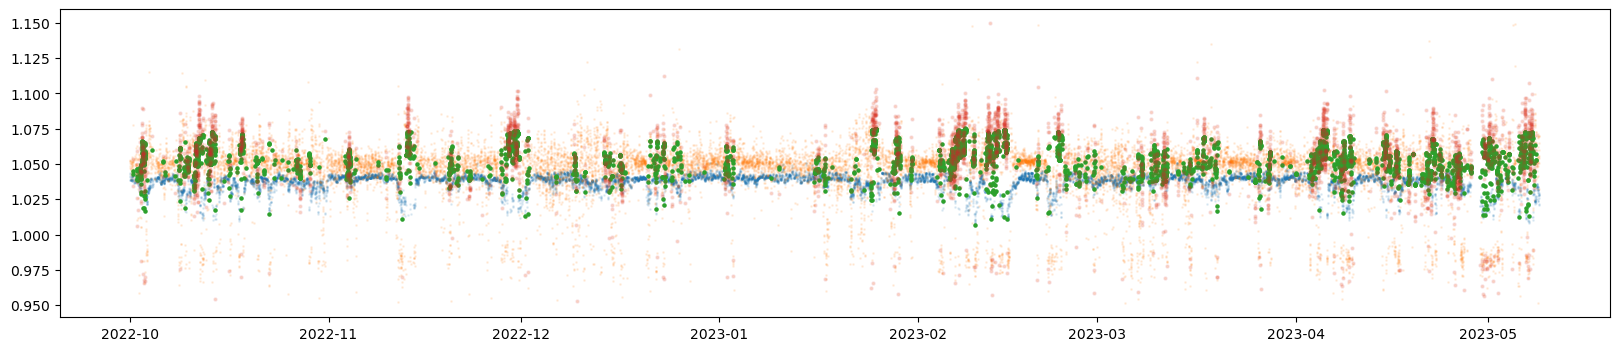

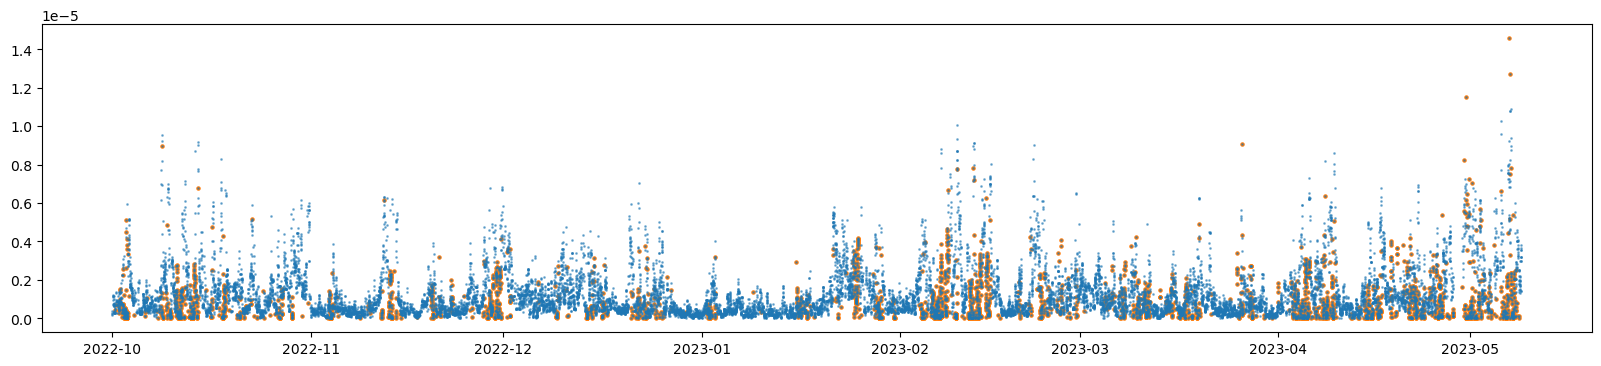

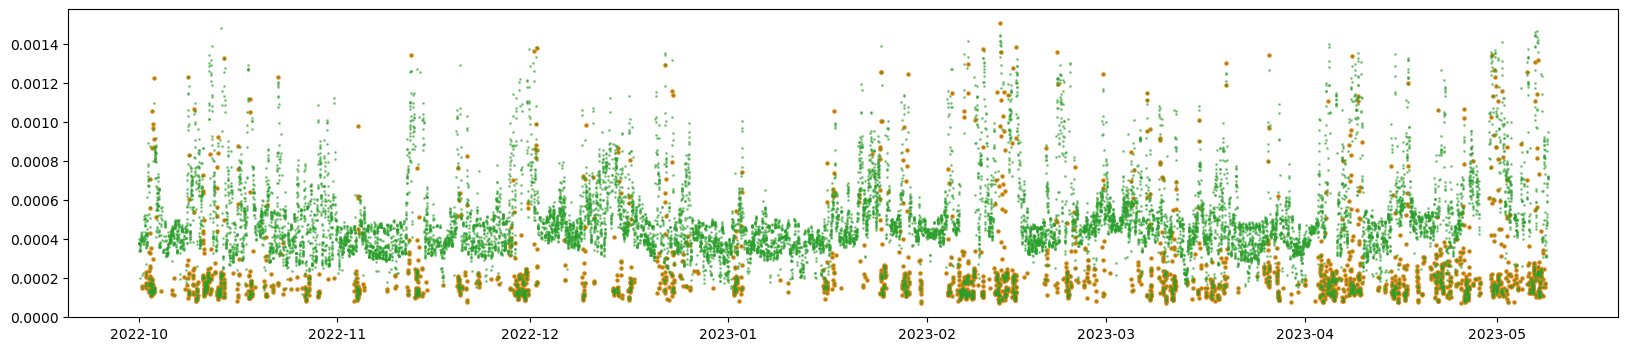

Test data plots


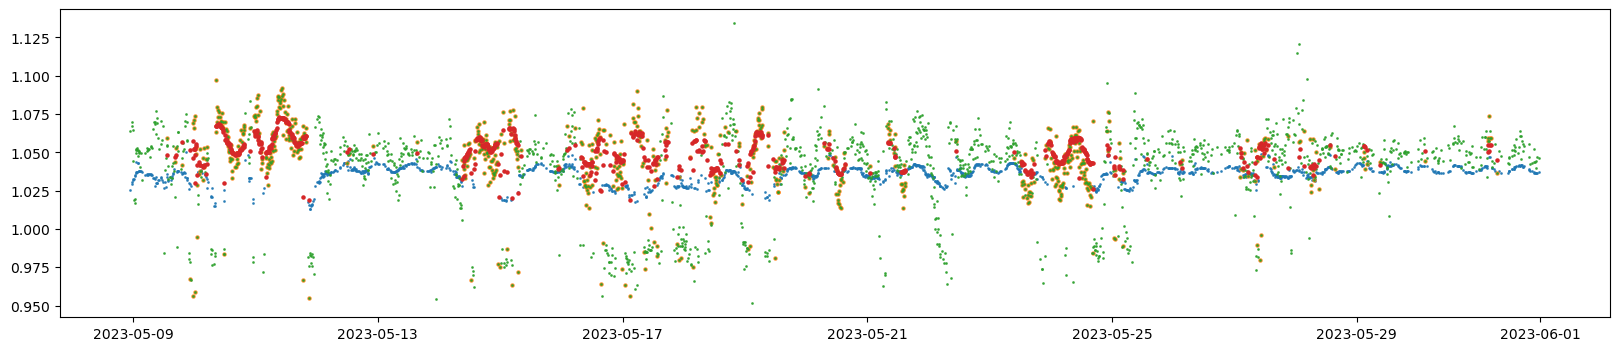

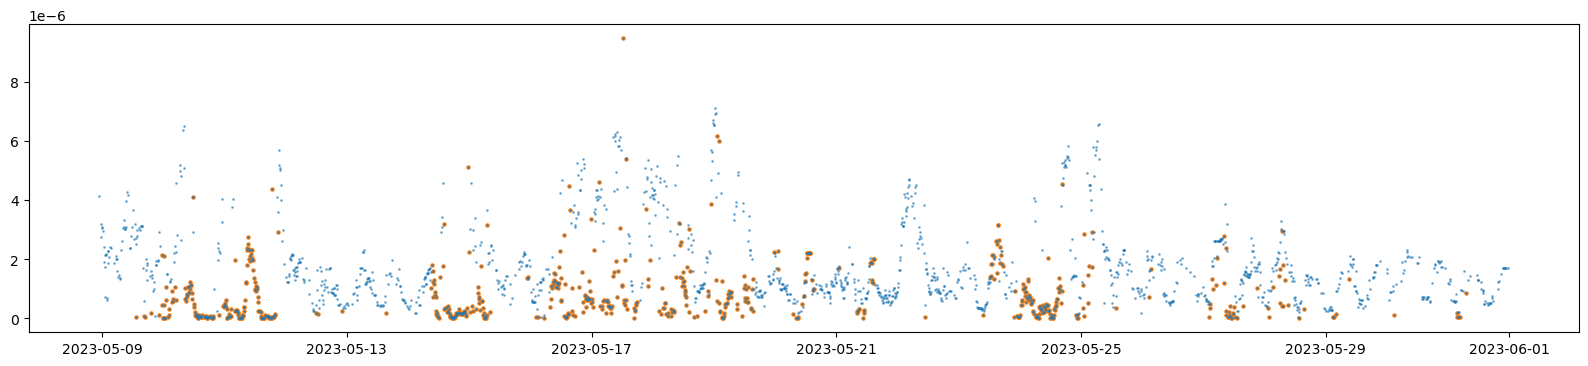

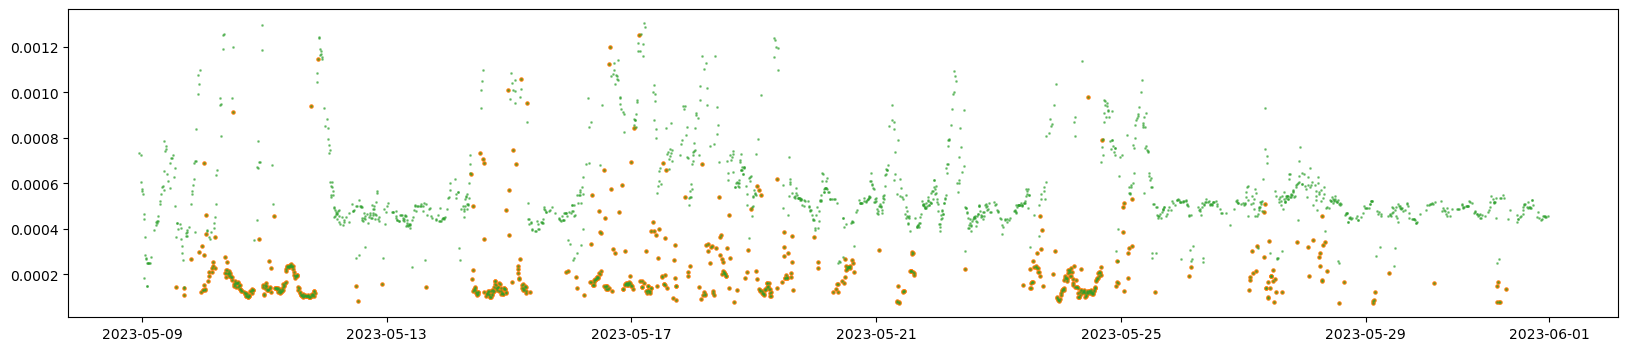

Location:  nw2f01 name_location:  NW2_F01
Loading data from local source
Loading data from API
0:	learn: -2.8352069	total: 9.43ms	remaining: 934ms
1:	learn: -2.8595694	total: 18.6ms	remaining: 913ms
2:	learn: -2.8815443	total: 26.7ms	remaining: 863ms
3:	learn: -2.8967908	total: 37.5ms	remaining: 901ms
4:	learn: -2.9137163	total: 47.2ms	remaining: 896ms
5:	learn: -2.9327541	total: 55.7ms	remaining: 873ms
6:	learn: -2.9462394	total: 68.9ms	remaining: 915ms
7:	learn: -2.9576344	total: 85.7ms	remaining: 985ms
8:	learn: -2.9674848	total: 101ms	remaining: 1.02s
9:	learn: -2.9735893	total: 114ms	remaining: 1.03s
10:	learn: -2.9884451	total: 124ms	remaining: 1s
11:	learn: -2.9926957	total: 133ms	remaining: 973ms
12:	learn: -3.0040069	total: 143ms	remaining: 954ms
13:	learn: -3.0140959	total: 150ms	remaining: 924ms
14:	learn: -3.0256980	total: 161ms	remaining: 911ms
15:	learn: -3.0414696	total: 169ms	remaining: 885ms
16:	learn: -3.0460945	total: 178ms	remaining: 871ms
17:	learn: -3.0498866	tota

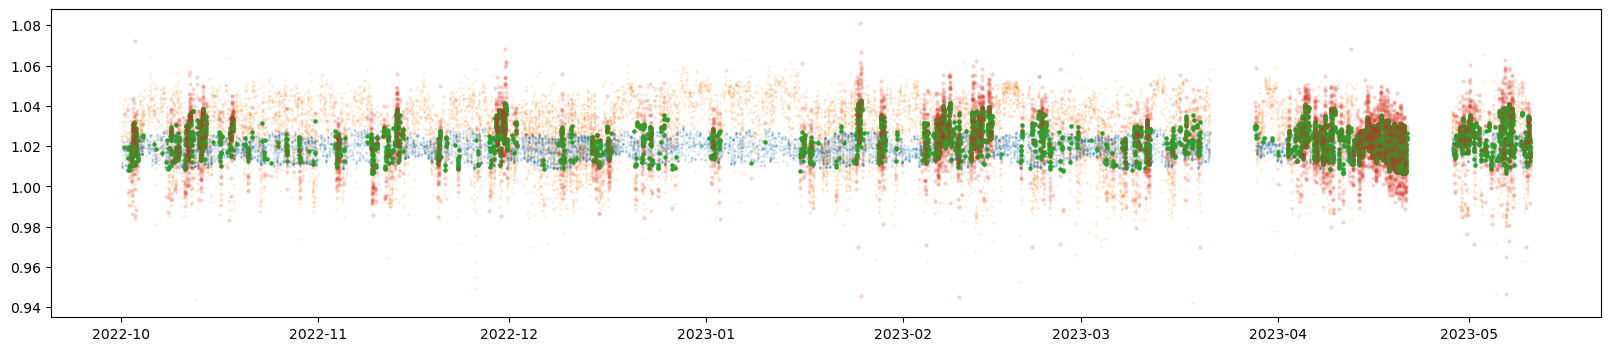

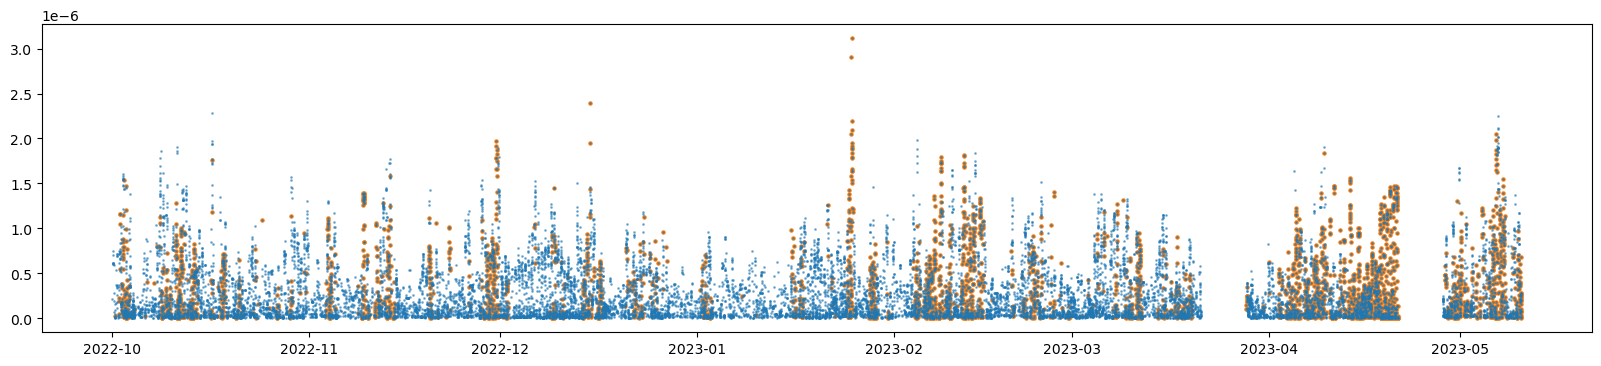

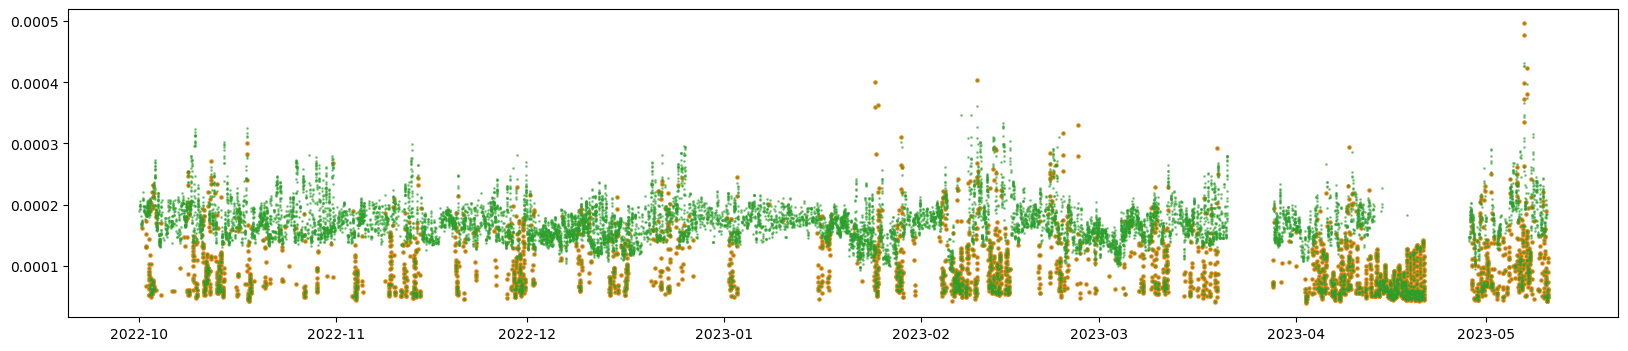

Test data plots


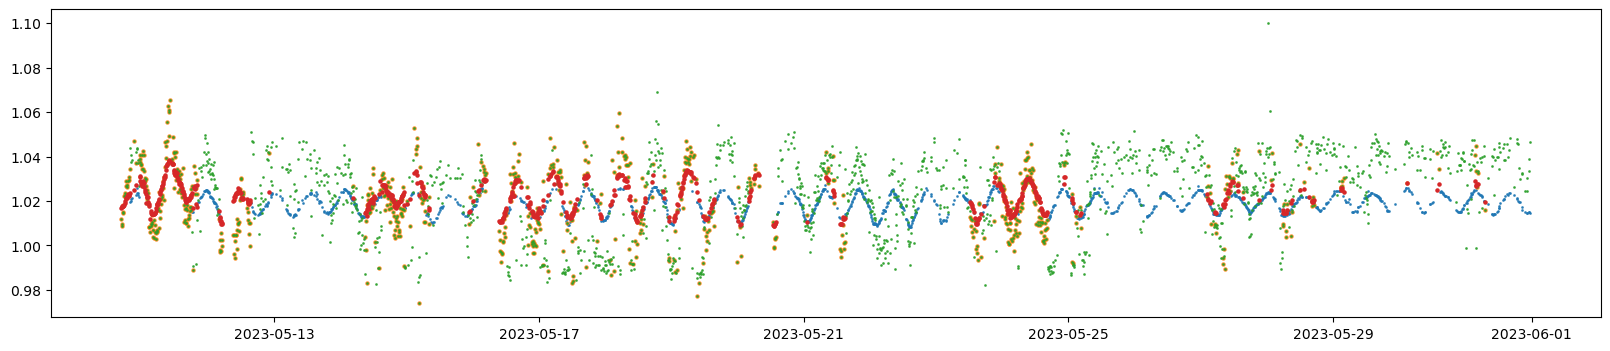

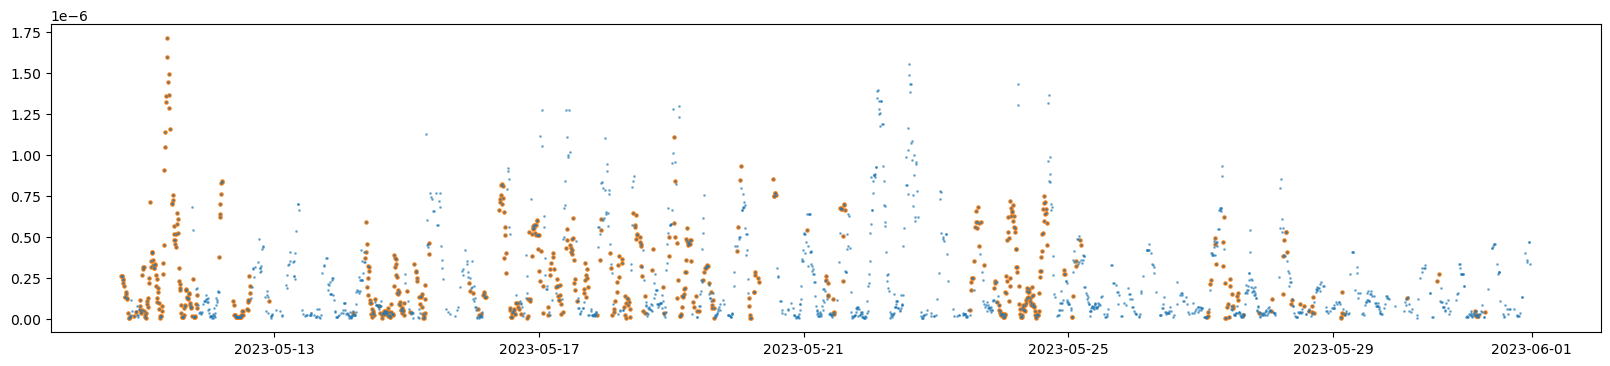

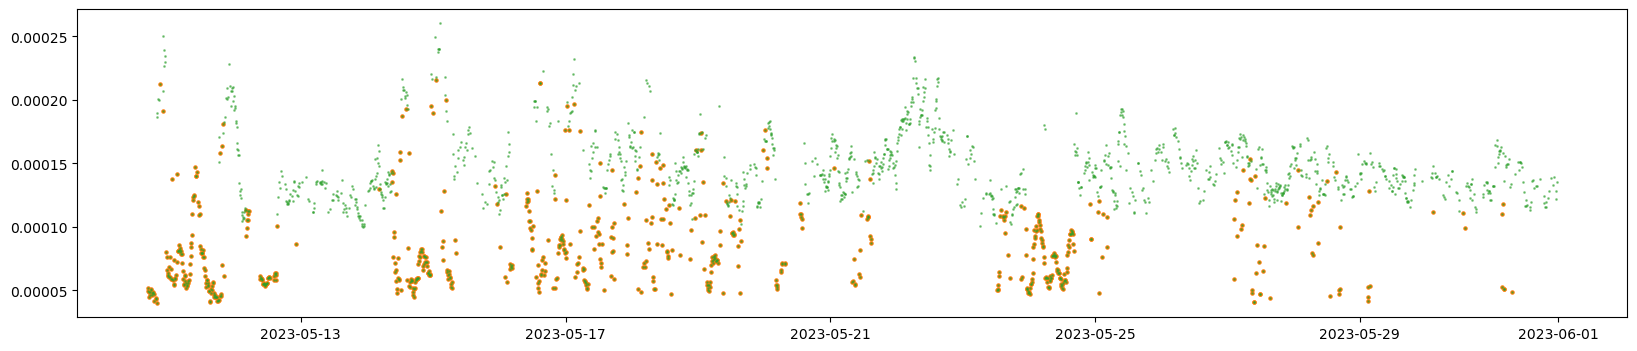

Location:  nw2d01 name_location:  NW2_D01
Loading data from local source
Loading data from API
0:	learn: -2.4547633	total: 11.1ms	remaining: 1.1s
1:	learn: -2.4837039	total: 18.9ms	remaining: 925ms
2:	learn: -2.5104650	total: 42.8ms	remaining: 1.38s
3:	learn: -2.5335123	total: 50.5ms	remaining: 1.21s
4:	learn: -2.5524652	total: 60.6ms	remaining: 1.15s
5:	learn: -2.5718294	total: 69.1ms	remaining: 1.08s
6:	learn: -2.5946076	total: 79.2ms	remaining: 1.05s
7:	learn: -2.6094297	total: 86.9ms	remaining: 1000ms
8:	learn: -2.6266380	total: 96.5ms	remaining: 975ms
9:	learn: -2.6450752	total: 104ms	remaining: 936ms
10:	learn: -2.6652059	total: 116ms	remaining: 937ms
11:	learn: -2.6813421	total: 128ms	remaining: 942ms
12:	learn: -2.6981942	total: 139ms	remaining: 930ms
13:	learn: -2.7131425	total: 149ms	remaining: 913ms
14:	learn: -2.7275172	total: 160ms	remaining: 904ms
15:	learn: -2.7413202	total: 168ms	remaining: 883ms
16:	learn: -2.7512308	total: 182ms	remaining: 890ms
17:	learn: -2.7639183	

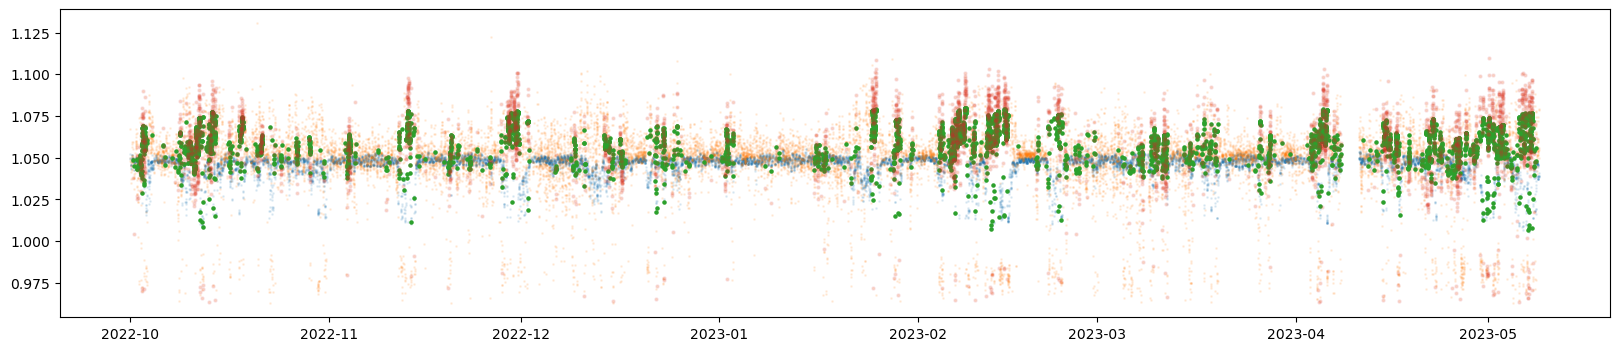

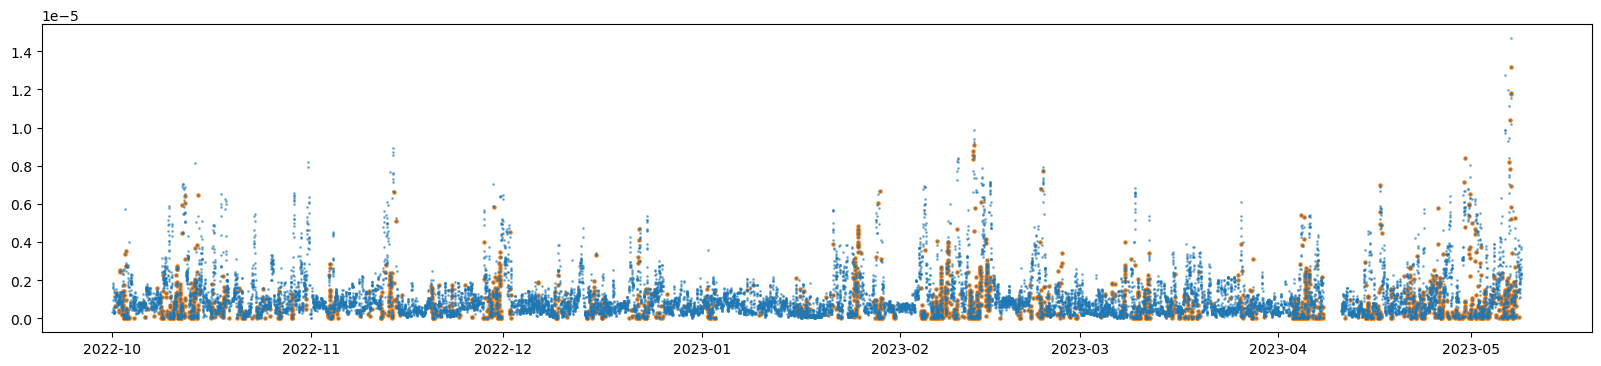

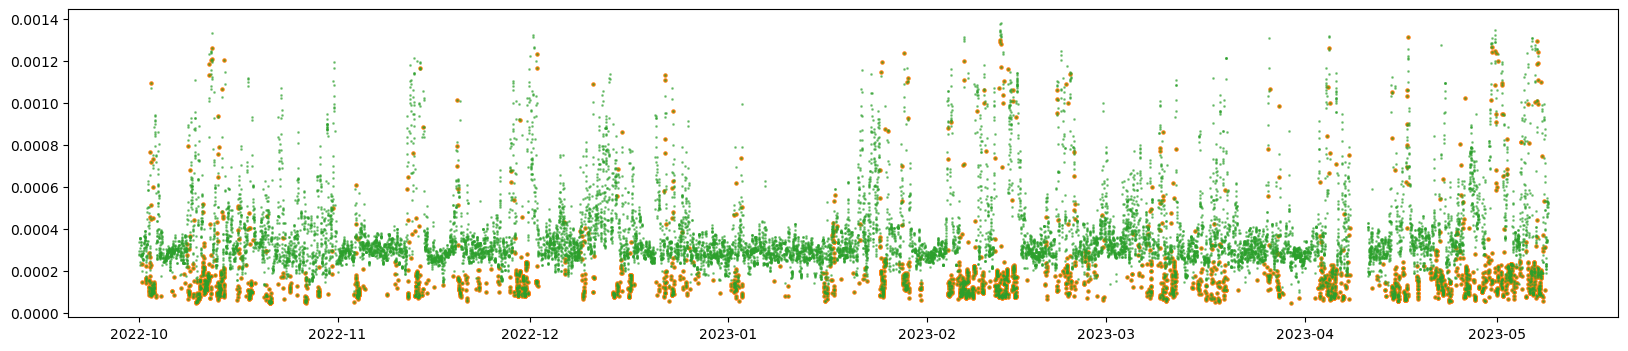

Test data plots


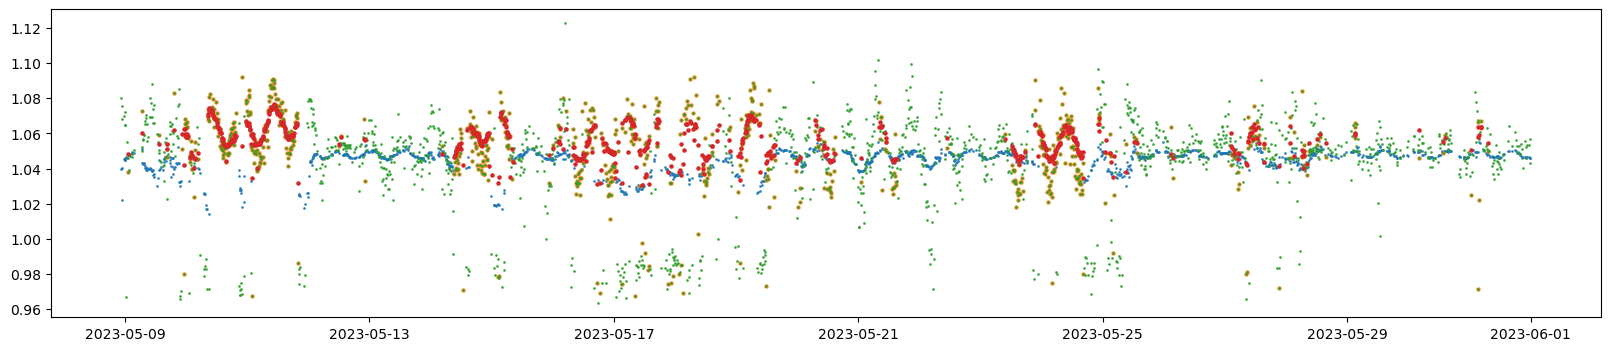

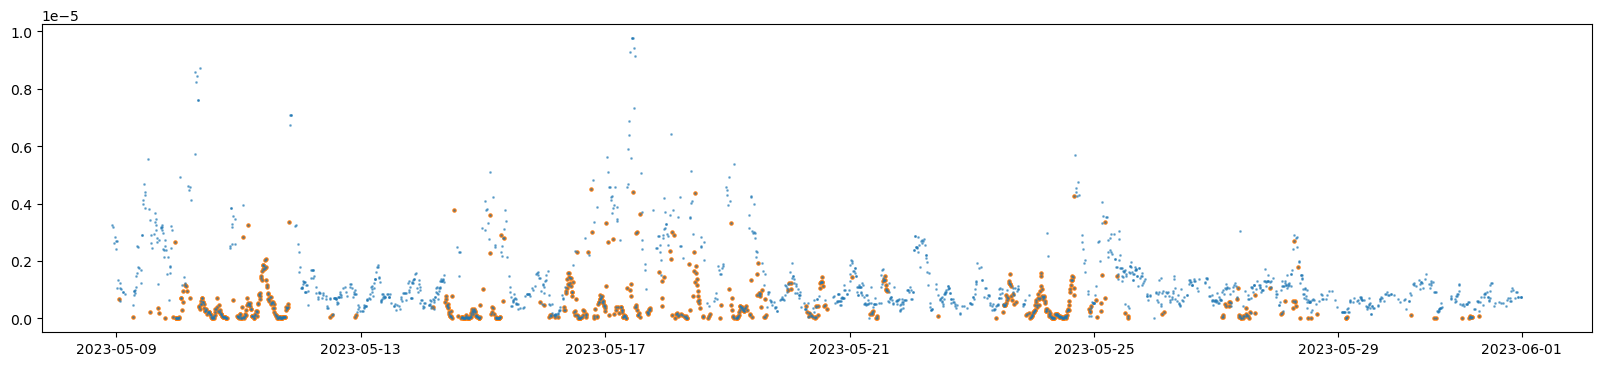

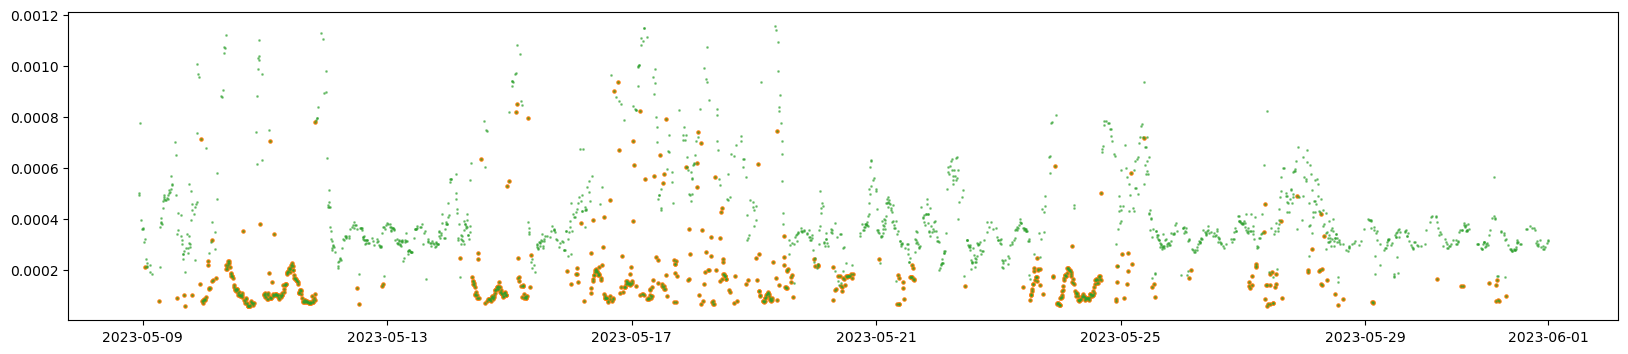

In [339]:
start  = datetime.datetime(2022,10,1,tzinfo=utc)
stop  = datetime.datetime(2023,8,1,tzinfo=utc)

for location in locations[0:3]:
    name_location = '_'.join(['NW2', location.split('nw2')[1].upper()])
    home_folder = "../../"
    print("Location: ", location, "name_location: ", name_location)


    ### DATA HANDLING 
    ## Load turbine data
    try:
        # Load data from local source
        print("Loading data from local source")
        data_path = os.path.join(home_folder, "data", "nw2", "raw", location + ".parquet")
        turbine_data = pd.read_parquet(data_path)
    
    except:
        # Load data from API
        print("Loading data from API")
        dsg = DatasetGetter(start, stop, location)
        dsg.get_longterm_data()
        dsg.save_data(data_path)
        turbine_data = dsg.data

    ## Load weather station data
    weather_data_path = "../../data/nw2/mvbc_data.parquet"
    weather_station_data = pd.read_parquet(weather_data_path)

    ## Load the tracked modes   
    modes = ['SS2']
    tracked_modes_data = {}
    for mode in modes:
        mode_data_path = os.path.join(home_folder, "data", "nw2", "tracked_modes", "_".join([mode, location.upper()]) + ".parquet")
        tracked_modes_data[mode] = pd.read_parquet(mode_data_path)


    ### DATA PREPROCESSING

    ## Select the appropriate data frome the turbine data

    # The data is filtered to only include the mean values of the variables
    means_data = turbine_data.filter(regex = 'mean')
    # The data is filtered to remove the ACC data and only keep the SCADA
    means_SCADA_data = means_data.drop(columns = means_data.filter(regex = 'acc|ACC').columns)
    # The cyclic data and angles are transformed to sin and cos
    means_SCADA_data = sin_cos_angle_inputs(means_SCADA_data, angle_type = 'degrees', angles = ['winddirection', 'yaw'])
    # The data is filtered to only include variables with less than 5% missing values
    monitoring_inputs = means_SCADA_data.loc[:, means_SCADA_data.isna().sum() < 0.05 * means_SCADA_data.shape[0]]

    for mode in modes:
        tracked_mode = tracked_modes_data[mode]['frequency'].dropna()
        unique_tracked_mode = tracked_mode.groupby(tracked_mode.index).filter(lambda x: len(x) == 1)
        inputs_ = pd.concat([monitoring_inputs, weather_station_data], axis=1)
        # keep inputs with more than 75% of the data
        inputs = inputs_.loc[:, inputs_.isna().sum() < 0.25 * inputs_.shape[0]]
        y = unique_tracked_mode
        X = inputs.loc[y.index].dropna()
        X_parked = get_parked_data(X)
        y = y.loc[X.index]
        y_parked = y.loc[X_parked.index]

        # Split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
        X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=123)

        # Split the parked data into train and test
        X_train_parked, X_test_parked, y_train_parked, y_test_parked = train_test_split(X_parked, y_parked, test_size=0.1, shuffle=False)
        X_train_parked_, X_val_parked, y_train_parked_, y_val_parked = train_test_split(X_train_parked, y_train_parked, test_size=0.1, shuffle=True, random_state=123)

        rpm_split = 5

        X_lowrpm = X.loc[X.filter(regex = 'rpm')[X.filter(regex = 'rpm') < rpm_split].dropna().index]
        y_lowrpm = y.loc[X_lowrpm.index]

        X_lowrpm_train = X_train.loc[X_train.filter(regex = 'rpm')[X_train.filter(regex = 'rpm') < rpm_split].dropna().index]
        y_lowrpm_train = y_train.loc[X_lowrpm_train.index]
        X_lowrpm_test = X_test.loc[X_test.filter(regex = 'rpm')[X_test.filter(regex = 'rpm') < rpm_split].dropna().index]
        y_lowrpm_test = y_test.loc[X_lowrpm_test.index]

        cb_regr = CatBoostRegressor(iterations=100, random_seed=13, posterior_sampling=True, loss_function='RMSEWithUncertainty')
        cb_regr.fit(X_lowrpm_train, y_lowrpm_train)


        inputs_ = X_train.dropna()
        targets_ = y_train

        preds = cb_regr.virtual_ensembles_predict(inputs_, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
        preds_df = pd.DataFrame(preds, columns=['mean', 'knowledge', 'data'], index=inputs_.index)

        mean_preds = preds[:,0] # mean values predicted by a virtual ensemble
        knowledge = preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
        data = preds[:,2] # average estimated data uncertainty

        parked_preds = cb_regr.virtual_ensembles_predict(X_lowrpm_train, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
        parked_preds_df = pd.DataFrame(parked_preds, columns=['mean', 'knowledge', 'data'], index=X_lowrpm_train.index)

        parked_mean_preds = parked_preds[:,0] # mean values predicted by a virtual ensemble
        parked_knowledge = parked_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
        parked_data = parked_preds[:,2] # average estimated data uncertainty

        print('Train data plots')

        plt.figure(figsize=(20,4))
        plt.scatter(inputs_.index, mean_preds, label='predictions', s=1, alpha=0.1)
        plt.scatter(targets_.index, targets_, label='actual', s=1, alpha=0.1)
        plt.scatter(parked_preds_df.index, parked_preds_df['mean'], label='parked predictions', s=5, alpha=1.0)
        plt.scatter(y_lowrpm_train.index, y_lowrpm_train, label='parked', s=5, alpha=0.1)
        plt.show()
        plt.figure(figsize=(20,4))
        plt.scatter(parked_preds_df['knowledge'].index, parked_preds_df['knowledge'],s=5, alpha=1.0, color='tab:orange')
        plt.scatter(preds_df['knowledge'].index, preds_df['knowledge'], alpha=0.5, color='tab:blue',s=1)
        plt.show()
        plt.figure(figsize=(20,4))
        plt.scatter(parked_preds_df['data'].index, parked_preds_df['data'], s=5, alpha=1.0, color='tab:orange')
        plt.scatter(preds_df['data'].index, preds_df['data'],s=1, alpha=0.5, color='tab:green')
        plt.show()

        print('Test data plots')

        inputs_ = X_test.dropna()
        targets_ = y_test

        preds = cb_regr.virtual_ensembles_predict(inputs_, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
        preds_df = pd.DataFrame(preds, columns=['mean', 'knowledge', 'data'], index=inputs_.index)

        mean_preds = preds[:,0] # mean values predicted by a virtual ensemble
        knowledge = preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
        data = preds[:,2] # average estimated data uncertainty

        parked_preds = cb_regr.virtual_ensembles_predict(X_lowrpm_test, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
        parked_preds_df = pd.DataFrame(parked_preds, columns=['mean', 'knowledge', 'data'], index=X_lowrpm_test.index)

        parked_mean_preds = parked_preds[:,0] # mean values predicted by a virtual ensemble
        parked_knowledge = parked_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
        parked_data = parked_preds[:,2] # average estimated data uncertainty

        plt.figure(figsize=(20,4))
        plt.scatter(inputs_.index, mean_preds, label='predictions', s=1, alpha=0.8)
        plt.scatter(y_lowrpm_test.index, y_lowrpm_test, label='parked', s=5, alpha=0.8)
        plt.scatter(targets_.index, targets_, label='actual', s=1, alpha=0.8)
        plt.scatter(parked_preds_df.index, parked_preds_df['mean'], label='parked predictions', s=5, alpha=1.0)

        plt.show()
        plt.figure(figsize=(20,4))
        plt.scatter(parked_preds_df['knowledge'].index, parked_preds_df['knowledge'],s=5, alpha=1.0, color='tab:orange')
        plt.scatter(preds_df['knowledge'].index, preds_df['knowledge'], alpha=0.5, color='tab:blue',s=1)
        plt.show()
        plt.figure(figsize=(20,4))
        plt.scatter(parked_preds_df['data'].index, parked_preds_df['data'], s=5, alpha=1.0, color='tab:orange')
        plt.scatter(preds_df['data'].index, preds_df['data'],s=1, alpha=0.5, color='tab:green')

        plt.show()

        

    

In [326]:
from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

train_pool = Pool(X_train_parked, y_train_parked, feature_names=X_train.columns.tolist())
test_pool = Pool(X_test_parked, y_test_parked, feature_names=X_test.columns.tolist())

cb_regr = CatBoostRegressor(iterations=100)
summary = cb_regr.select_features(
    train_pool,
    eval_set=test_pool,
    features_for_select='0-17',
    num_features_to_select=1,
    steps=19,
    algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=EShapCalcType.Exact,
    train_final_model=True,
    logging_level='Silent',
    plot=True
)

The number of features selection steps (19) is greater than the number of features to eliminate (17). The number of steps was reduced to 17.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [328]:
cb_regr = CatBoostRegressor(iterations=100, random_seed=13, posterior_sampling=True, loss_function='RMSEWithUncertainty')
cb_regr.fit(X_lowrpm_train, y_lowrpm_train)

0:	learn: -2.6971665	total: 10.1ms	remaining: 1s
1:	learn: -2.7144282	total: 21.2ms	remaining: 1.04s
2:	learn: -2.7380159	total: 29.6ms	remaining: 957ms
3:	learn: -2.7603841	total: 37.9ms	remaining: 911ms
4:	learn: -2.7790068	total: 45.5ms	remaining: 865ms
5:	learn: -2.7995459	total: 54ms	remaining: 845ms
6:	learn: -2.8144772	total: 61.8ms	remaining: 821ms
7:	learn: -2.8288787	total: 71.5ms	remaining: 823ms
8:	learn: -2.8465458	total: 83.8ms	remaining: 847ms
9:	learn: -2.8626376	total: 95.7ms	remaining: 861ms
10:	learn: -2.8779726	total: 108ms	remaining: 873ms
11:	learn: -2.8945864	total: 116ms	remaining: 852ms
12:	learn: -2.9089225	total: 124ms	remaining: 832ms
13:	learn: -2.9209252	total: 132ms	remaining: 811ms
14:	learn: -2.9358990	total: 141ms	remaining: 799ms
15:	learn: -2.9504763	total: 149ms	remaining: 782ms
16:	learn: -2.9589101	total: 158ms	remaining: 770ms
17:	learn: -2.9713392	total: 166ms	remaining: 754ms
18:	learn: -2.9834663	total: 175ms	remaining: 747ms
19:	learn: -2.996

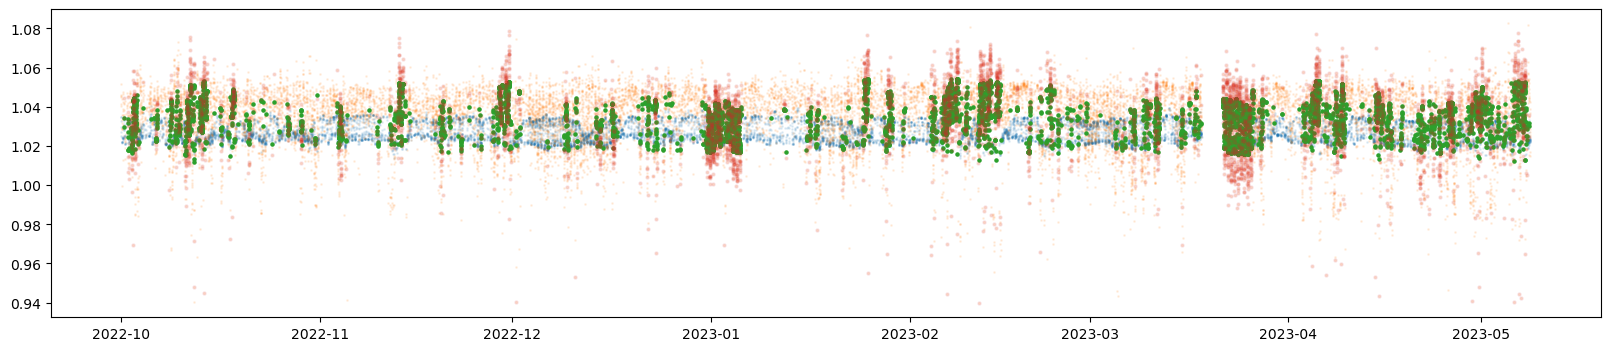

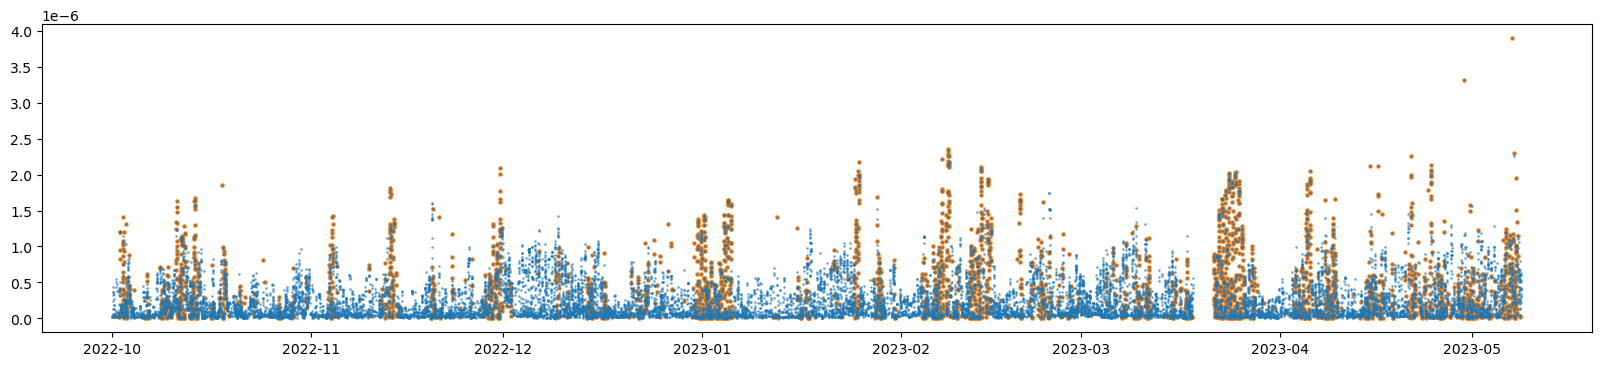

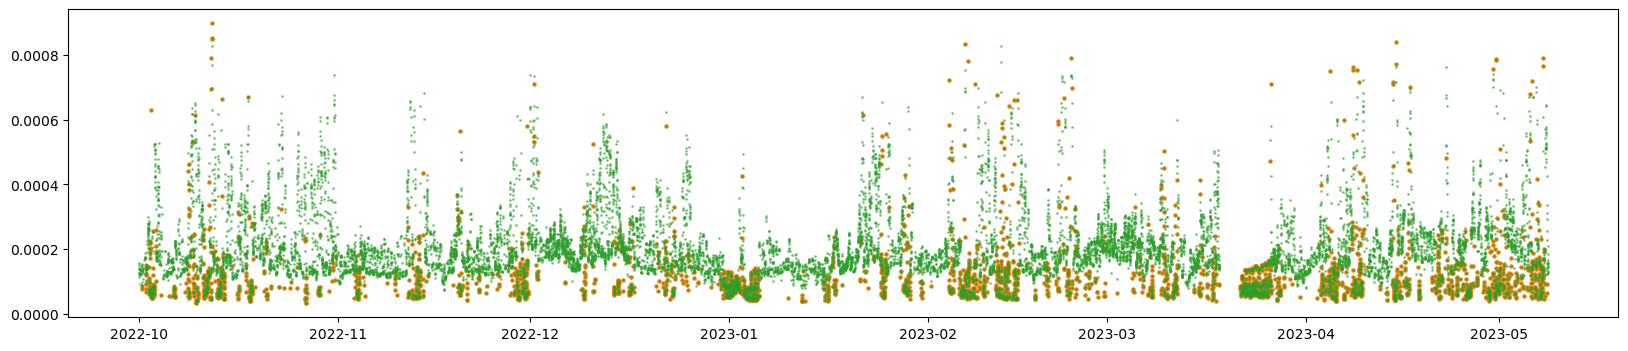

In [333]:
inputs_ = X_train.dropna()
targets_ = y_train

preds = cb_regr.virtual_ensembles_predict(inputs_, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
preds_df = pd.DataFrame(preds, columns=['mean', 'knowledge', 'data'], index=inputs_.index)

mean_preds = preds[:,0] # mean values predicted by a virtual ensemble
knowledge = preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
data = preds[:,2] # average estimated data uncertainty

parked_preds = cb_regr.virtual_ensembles_predict(X_lowrpm_train, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
parked_preds_df = pd.DataFrame(parked_preds, columns=['mean', 'knowledge', 'data'], index=X_lowrpm_train.index)

parked_mean_preds = parked_preds[:,0] # mean values predicted by a virtual ensemble
parked_knowledge = parked_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
parked_data = parked_preds[:,2] # average estimated data uncertainty

plt.figure(figsize=(20,4))
plt.scatter(inputs_.index, mean_preds, label='predictions', s=1, alpha=0.1)
plt.scatter(targets_.index, targets_, label='actual', s=1, alpha=0.1)
plt.scatter(parked_preds_df.index, parked_preds_df['mean'], label='parked predictions', s=5, alpha=1.0)
plt.scatter(y_lowrpm_train.index, y_lowrpm_train, label='parked', s=5, alpha=0.1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['knowledge'].index, parked_preds_df['knowledge'],s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['knowledge'].index, preds_df['knowledge'], alpha=0.5, color='tab:blue',s=1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['data'].index, parked_preds_df['data'], s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['data'].index, preds_df['data'],s=1, alpha=0.5, color='tab:green')

plt.show()

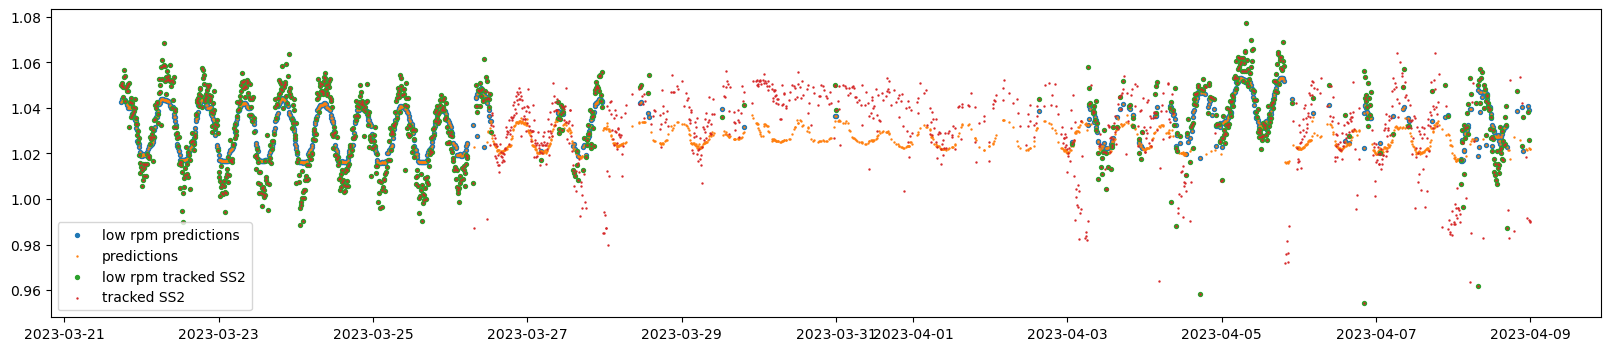

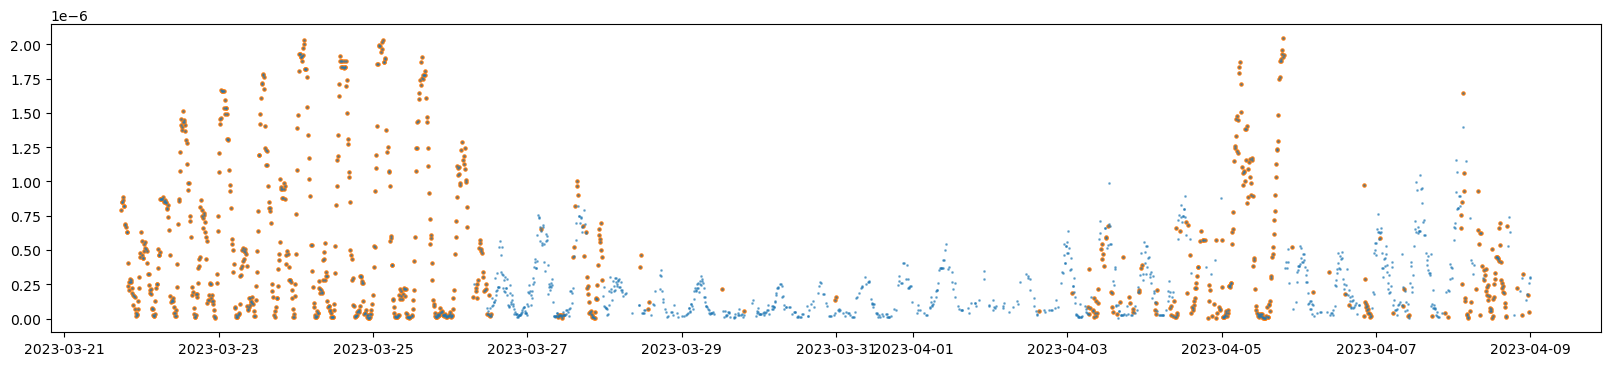

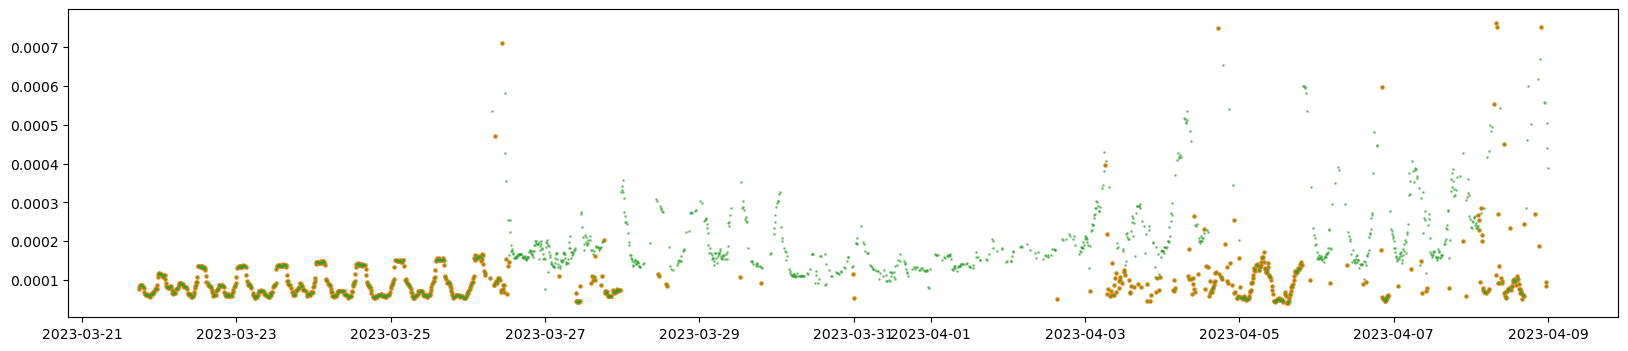

In [338]:
import pytz
plt_start = datetime.datetime(2023, 3, 20, 0, 0, 0, tzinfo = pytz.UTC)
plt_end = plt_start + datetime.timedelta(days=20)

plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df.loc[plt_start:plt_end].index, parked_preds_df.loc[plt_start:plt_end]['mean'], label='low rpm predictions', s=8, alpha=1.0)
plt.scatter(inputs_.loc[plt_start:plt_end].index, preds_df.loc[plt_start:plt_end]['mean'], label='predictions', s=0.5, alpha=1.0)
plt.scatter(y_lowrpm.loc[plt_start:plt_end].index, y_lowrpm.loc[plt_start:plt_end], label='low rpm tracked SS2', s=8, alpha=1.0)
plt.scatter(targets_.loc[plt_start:plt_end].index, targets_.loc[plt_start:plt_end], label='tracked SS2', s=0.5, alpha=1.0)


plt.legend()
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['knowledge'].loc[plt_start:plt_end].index, parked_preds_df['knowledge'].loc[plt_start:plt_end],s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['knowledge'].loc[plt_start:plt_end].index, preds_df['knowledge'].loc[plt_start:plt_end], alpha=0.5, color='tab:blue',s=1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['data'].loc[plt_start:plt_end].index, parked_preds_df['data'].loc[plt_start:plt_end], s=5, alpha=1.0, color='tab:orange', label='data uncertainty at low rpm')
plt.scatter(preds_df['data'].loc[plt_start:plt_end].index, preds_df['data'].loc[plt_start:plt_end],s=1, alpha=0.5, color='tab:green', label='data uncertainty')

plt.show()

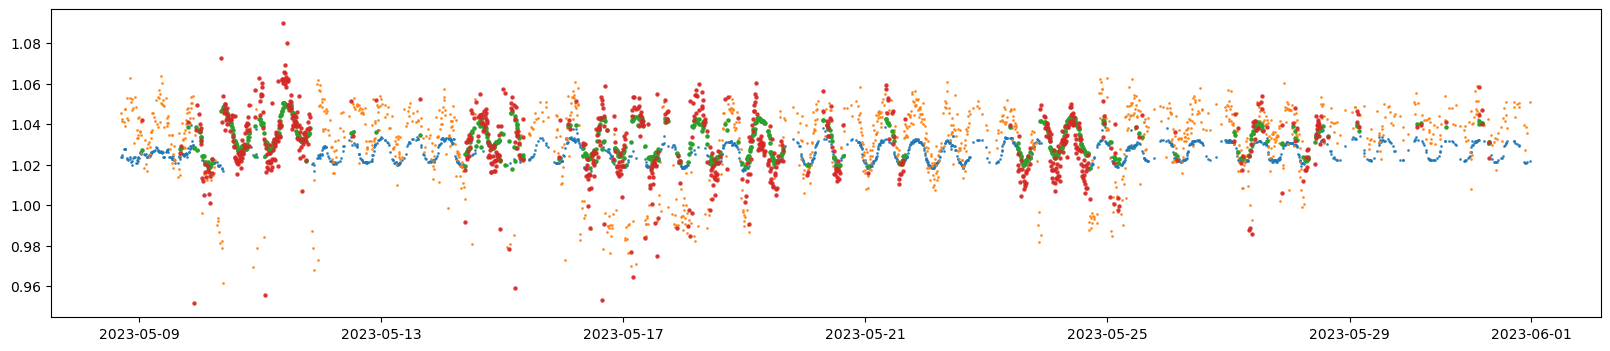

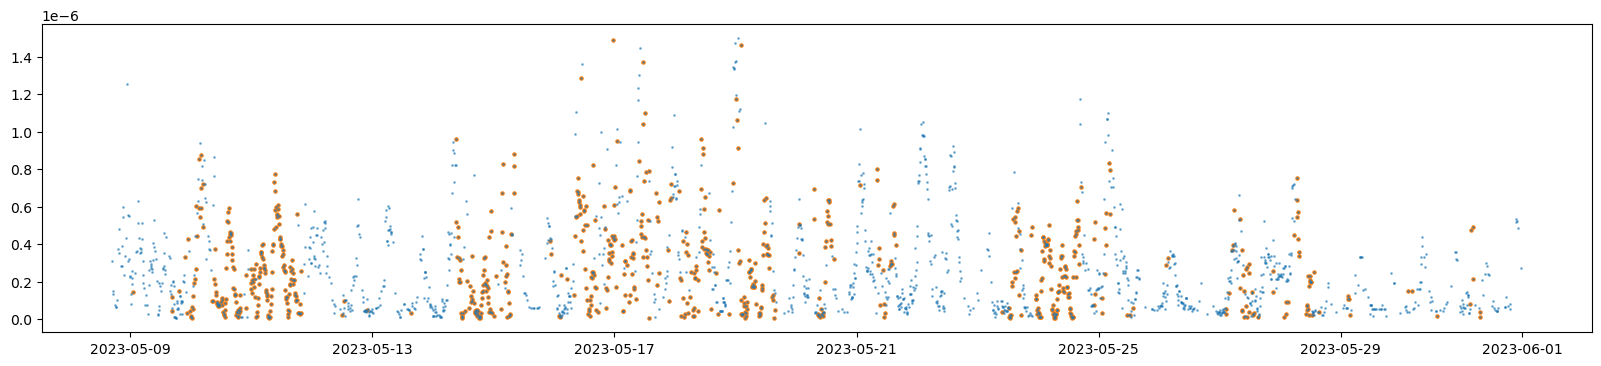

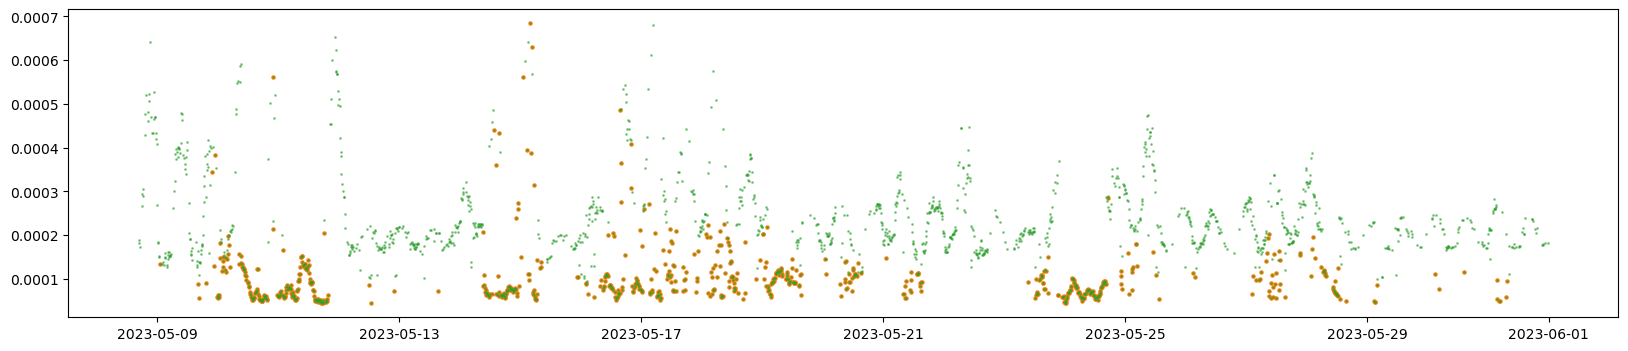

In [331]:
inputs_ = X_test.dropna()
targets_ = y_test

preds = cb_regr.virtual_ensembles_predict(inputs_, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
preds_df = pd.DataFrame(preds, columns=['mean', 'knowledge', 'data'], index=inputs_.index)

mean_preds = preds[:,0] # mean values predicted by a virtual ensemble
knowledge = preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
data = preds[:,2] # average estimated data uncertainty

parked_preds = cb_regr.virtual_ensembles_predict(X_lowrpm_test, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
parked_preds_df = pd.DataFrame(parked_preds, columns=['mean', 'knowledge', 'data'], index=X_lowrpm_test.index)

parked_mean_preds = parked_preds[:,0] # mean values predicted by a virtual ensemble
parked_knowledge = parked_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
parked_data = parked_preds[:,2] # average estimated data uncertainty

plt.figure(figsize=(20,4))
plt.scatter(inputs_.index, mean_preds, label='predictions', s=1, alpha=0.8)
plt.scatter(y_lowrpm_test.index, y_lowrpm_test, label='parked', s=5, alpha=0.8)
plt.scatter(targets_.index, targets_, label='actual', s=1, alpha=0.8)
plt.scatter(parked_preds_df.index, parked_preds_df['mean'], label='parked predictions', s=5, alpha=1.0)

plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['knowledge'].index, parked_preds_df['knowledge'],s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['knowledge'].index, preds_df['knowledge'], alpha=0.5, color='tab:blue',s=1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['data'].index, parked_preds_df['data'], s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['data'].index, preds_df['data'],s=1, alpha=0.5, color='tab:green')

plt.show()

Text(0, 0.5, 'Rotor speed (rpm)')

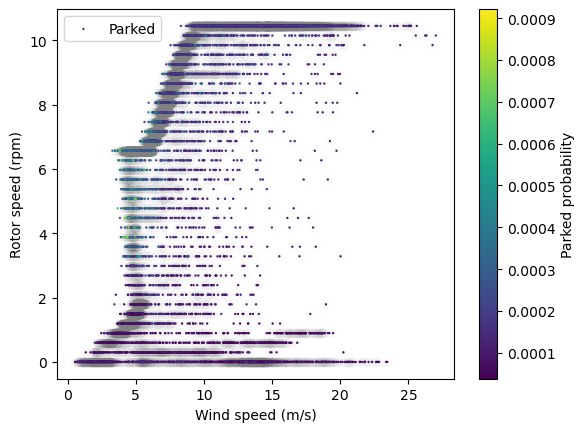

In [241]:
plt.scatter(X.filter(regex='windspeed'), X.filter(regex='rpm'), alpha=0.01, color='grey')
plt.scatter(X.filter(regex='windspeed'), X.filter(regex='rpm'), alpha=1.0,s=0.5, label='Parked', c=preds_df['data'])
plt.colorbar(label='Parked probability')
plt.legend()
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rotor speed (rpm)')

Text(0, 0.5, 'Rotor speed (rpm)')

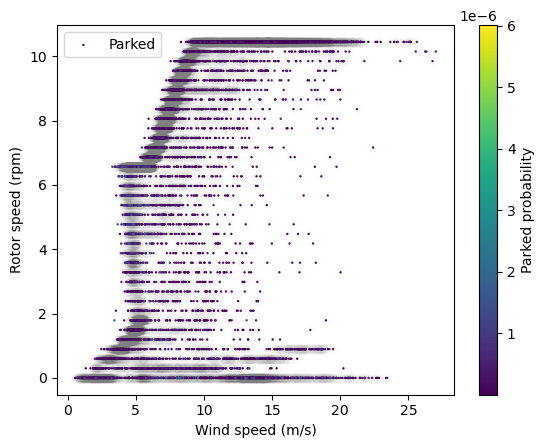

In [240]:
plt.scatter(X.filter(regex='windspeed'), X.filter(regex='rpm'), alpha=0.01, color='grey')
plt.scatter(X.filter(regex='windspeed'), X.filter(regex='rpm'), alpha=1.0,s=0.5, label='Parked', c=preds_df['knowledge'])
plt.colorbar(label='Parked probability')
plt.legend()
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rotor speed (rpm)')

In [301]:
cb_regr

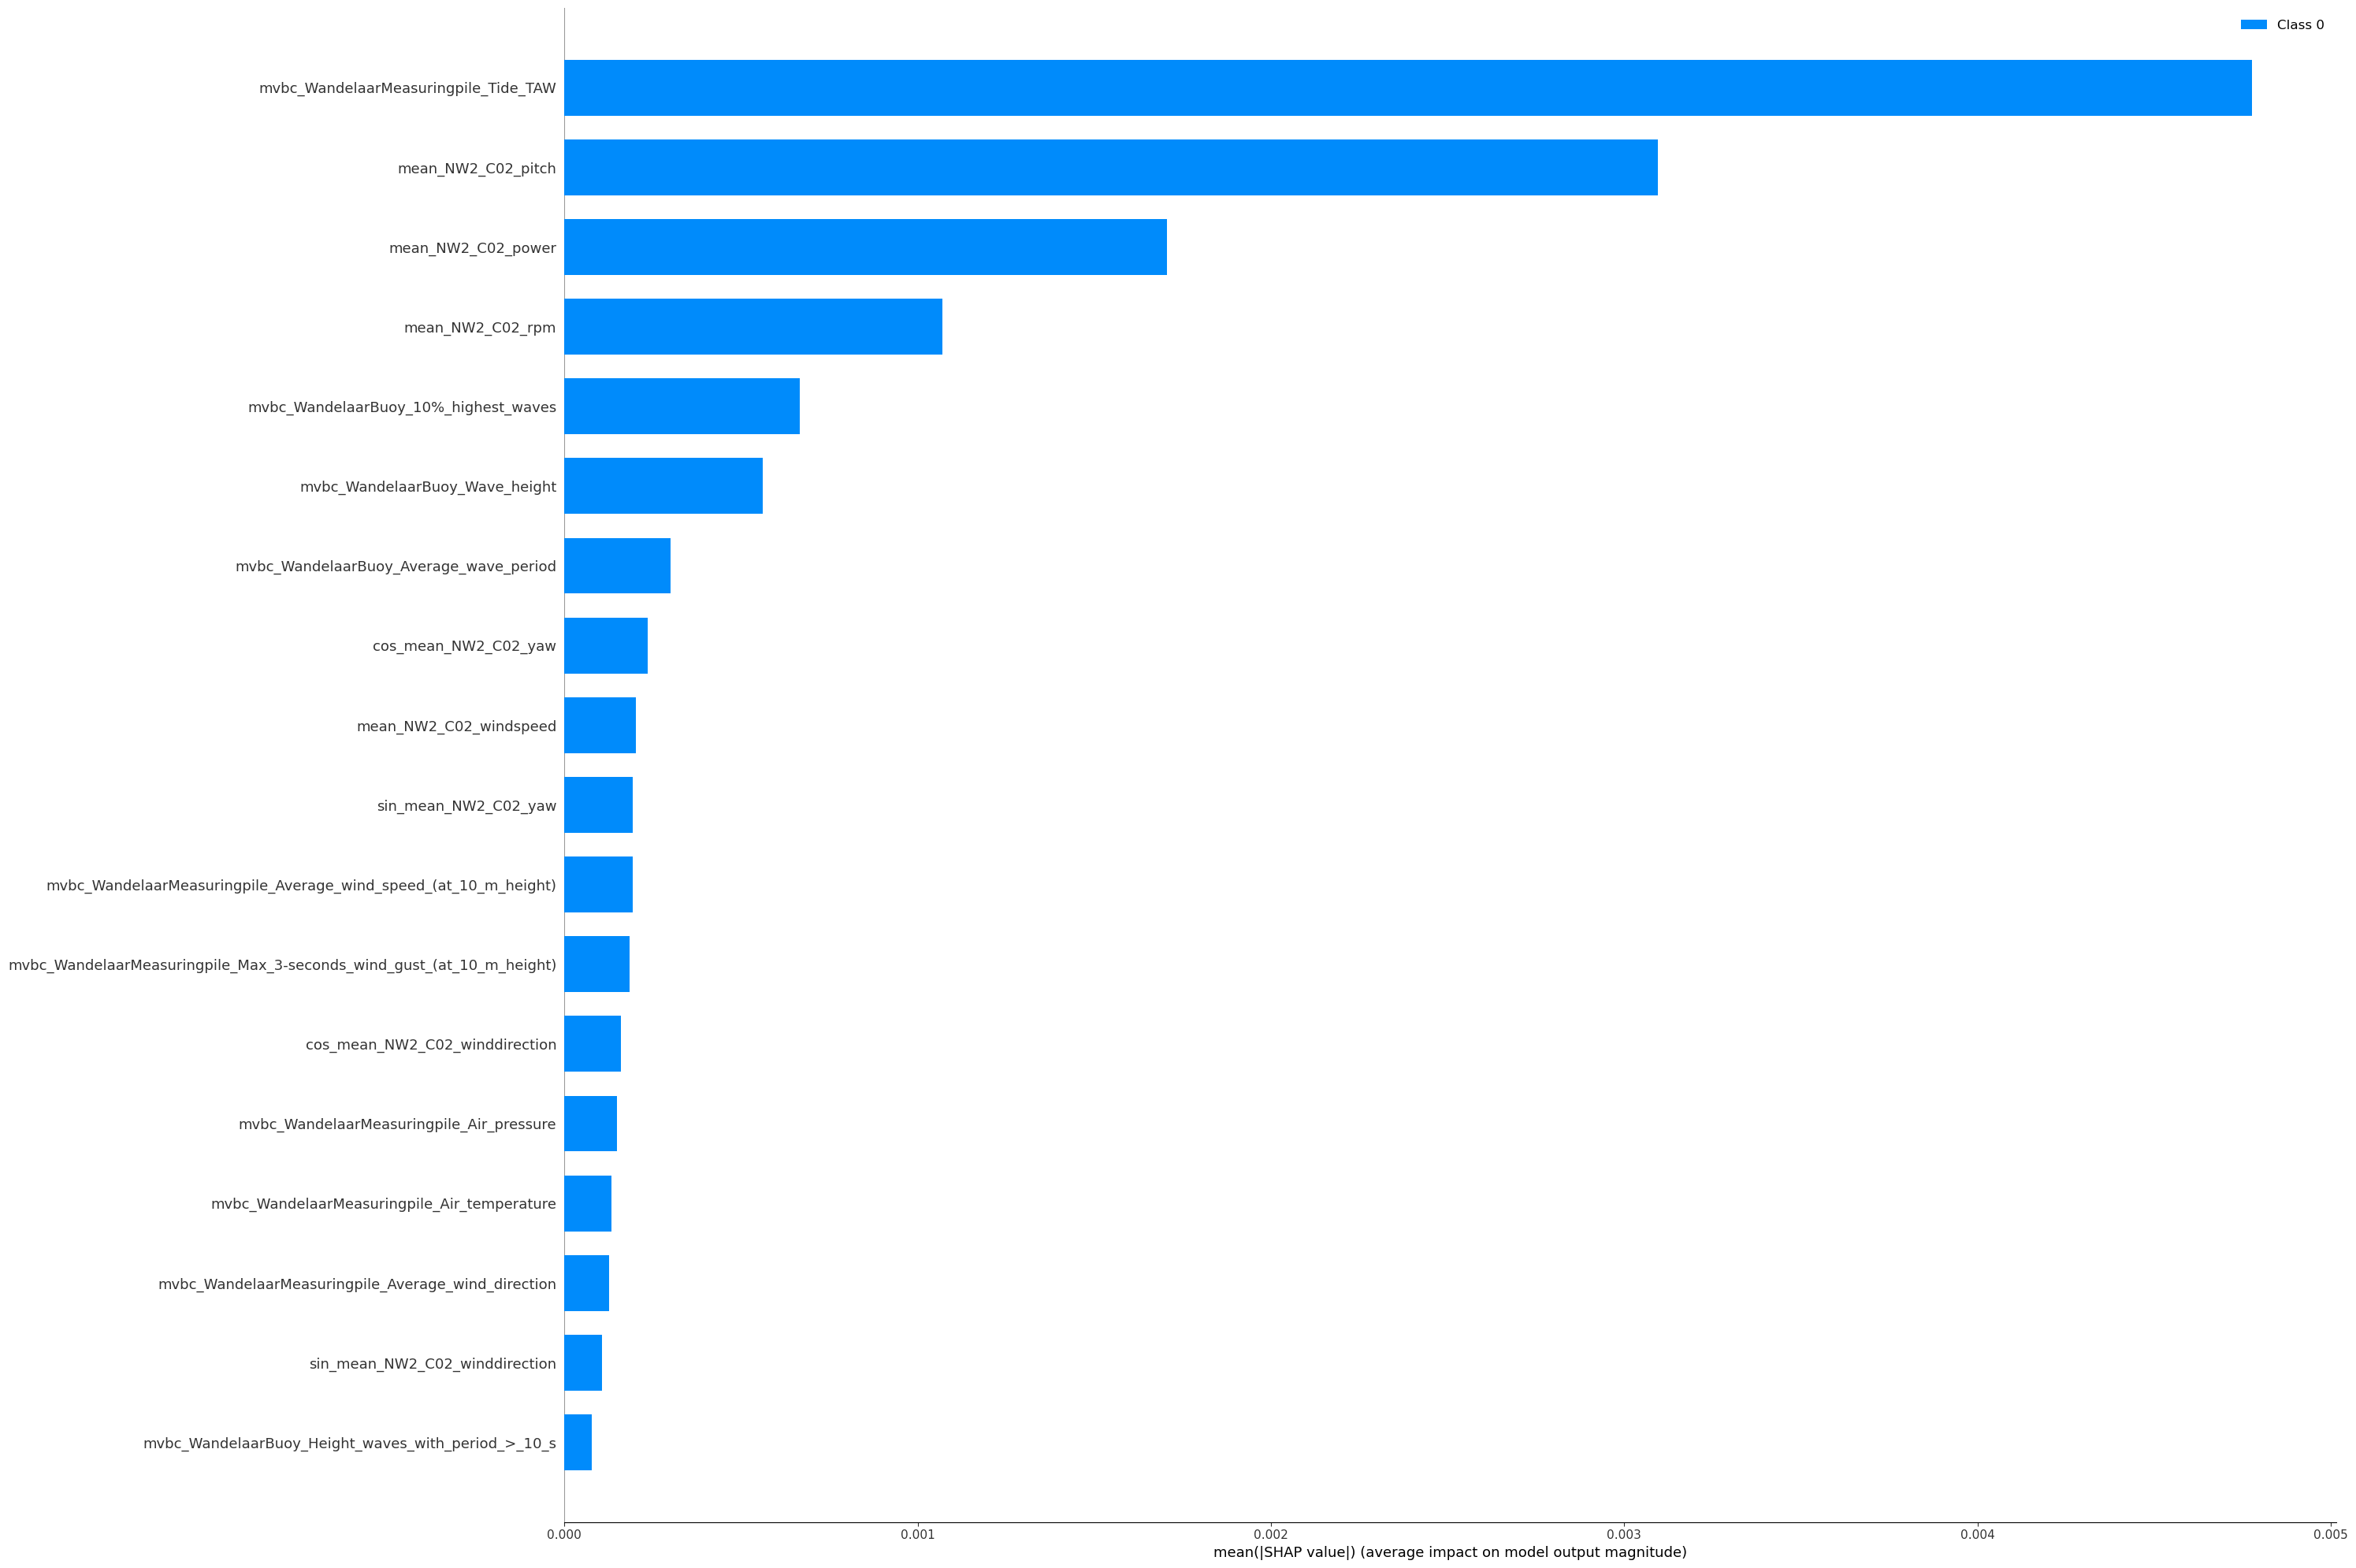

In [308]:
import catboost
from catboost import *
import shap
shap.initjs()

explainer = shap.TreeExplainer(cb_regr)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_size=[30,20])

Text(0, 0.5, 'Rotor speed (rpm)')

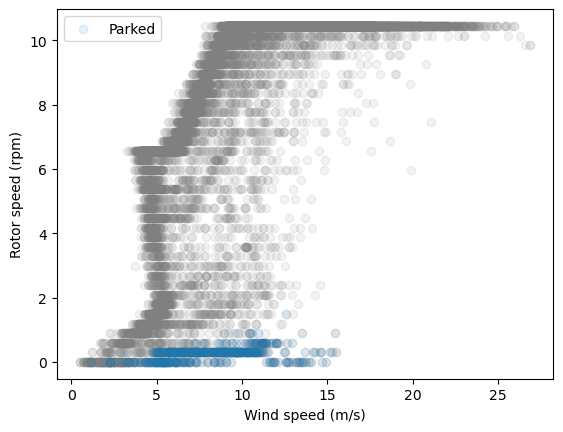

In [10]:
plt.scatter(X.filter(regex='windspeed'), X.filter(regex='rpm'), alpha=0.1, color='grey')
plt.scatter(X_parked.filter(regex='windspeed'), X_parked.filter(regex='rpm'), alpha=0.1, label='Parked')
plt.legend()
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rotor speed (rpm)')

# Belwind longterm

In [85]:
start  = datetime.datetime(2012,1,1,tzinfo=utc)
stop  = datetime.datetime(2023,7,19,tzinfo=utc)

location = 'bbc01'
name_location = 'BB_C01'

home_folder = "../../"
data_file_name = '_'.join([location, start.strftime("%Y%m%d"), stop.strftime("%Y%m%d")])
data_path = home_folder + "data/bb/raw/" + data_file_name + ".parquet"
data = pd.read_parquet(data_path)


SS1 = get_frequencies(data, 'SS1')
SS2 = get_frequencies(data, 'SS2')
FA1 = get_frequencies(data, 'FA1')

In [86]:
weather_data_path = "../../data/nw2/mvbc_data_longterm.parquet"
Thorntonbank_data_path = "../../data/nw2/Thorntonbank_data_longterm.parquet"
Westhinder_data_path = "../../data/nw2/Westhinder_data_longterm.parquet"

weather_data = pd.read_parquet(weather_data_path)

scada_inputs = data.filter(regex='mean')

inputs = \
    pd.concat(
        [
            weather_data,
            scada_inputs
        ],
        axis=1
    )

selected_columns = \
    [
       'Sea_water_temperature',
       'Wave_height',
       'Tide_TAW',
       'Average_wave_period',
       'Air_pressure',
       'Air_temperature',
       'mean_'+ name_location + '_rpm',
       'mean_'+ name_location + '_yaw',
       'mean_'+ name_location + '_pitch',
       'mean_'+ name_location + '_power',
       'mean_'+ name_location + '_windspeed',
       'mean_'+ name_location + '_winddirection'
    ]
inputs = inputs[selected_columns]

In [87]:
parked_data = get_parked_data(data)
parked_SS2 = get_frequencies(parked_data, 'SS2')
days = parked_SS2.groupby(parked_SS2.index.date).count()[parked_SS2.groupby(parked_SS2.index.date).count() > 144*0.2].dropna().index
parked_SS2['date'] = parked_SS2.index.date
parked_SS2_longterm = parked_SS2[np.isin(parked_SS2['date'], days)].drop(columns=['date'])

In [88]:
from sklearn.cluster import DBSCAN

time_difference = (parked_SS2_longterm.index-parked_SS2_longterm.index[0]).total_seconds()/60
parked_SS2_longterm['time_difference'] = time_difference
clustering = DBSCAN(eps=60*24*14, min_samples=2).fit(parked_SS2_longterm['time_difference'].values.reshape(-1, 1) )
parked_SS2_longterm['cluster'] = clustering.labels_

big_clusters = parked_SS2_longterm.groupby('cluster').count()[parked_SS2_longterm.groupby('cluster').count()>144].dropna().index
parked_SS2_longterm_big_clusters = parked_SS2_longterm[np.isin(parked_SS2_longterm['cluster'], big_clusters)]
unique_vals = parked_SS2_longterm_big_clusters['cluster'].unique()
parked_SS2_longterm_big_clusters['cluster'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))), inplace=True)

C:\Users\Max\AppData\Local\Temp\ipykernel_25396\837523136.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
# sklearn imports
from sklearn.model_selection import train_test_split

# oma_tracking imports
from oma_tracking.data.preprocessing import sin_cos_angle_inputs

random_state = 24
test_size = 0.2
angle_transformed_inputs = sin_cos_angle_inputs(inputs)
angle_columns = [angle for angle in inputs.columns if ('yaw' in angle or 'winddirection' in angle)]
angle_removed_inputs = inputs.drop(columns=angle_columns)

prediction_param = parked_SS2_longterm_big_clusters['mean_frequency'].copy()
y = prediction_param.dropna()
X = angle_transformed_inputs.loc[y.index].dropna()
y = y.loc[X.index]
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=test_size, random_state=random_state)


In [90]:
cb_regr = CatBoostRegressor(random_seed=13, posterior_sampling=True, loss_function='RMSEWithUncertainty')
cb_regr.fit(X, y)

0:	learn: -2.2104944	total: 8.86ms	remaining: 8.85s
1:	learn: -2.2326508	total: 18.4ms	remaining: 9.17s
2:	learn: -2.2527924	total: 27.8ms	remaining: 9.24s
3:	learn: -2.2749146	total: 36.8ms	remaining: 9.15s
4:	learn: -2.2955303	total: 49.2ms	remaining: 9.8s
5:	learn: -2.3108361	total: 59.2ms	remaining: 9.81s
6:	learn: -2.3288262	total: 68.3ms	remaining: 9.69s
7:	learn: -2.3435629	total: 79.5ms	remaining: 9.85s
8:	learn: -2.3631264	total: 88.4ms	remaining: 9.73s
9:	learn: -2.3767967	total: 98.2ms	remaining: 9.72s
10:	learn: -2.3959320	total: 110ms	remaining: 9.85s
11:	learn: -2.4141215	total: 121ms	remaining: 9.93s
12:	learn: -2.4323622	total: 132ms	remaining: 10s
13:	learn: -2.4470240	total: 143ms	remaining: 10.1s
14:	learn: -2.4609332	total: 153ms	remaining: 10.1s
15:	learn: -2.4718840	total: 163ms	remaining: 10s
16:	learn: -2.4838630	total: 171ms	remaining: 9.9s
17:	learn: -2.4980776	total: 181ms	remaining: 9.88s
18:	learn: -2.5088692	total: 190ms	remaining: 9.83s
19:	learn: -2.5202

In [91]:
inputs_ = angle_transformed_inputs.dropna()
targets_ = SS2

preds = cb_regr.virtual_ensembles_predict(inputs_, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=500)
preds_df = pd.DataFrame(preds, columns=['mean', 'knowledge', 'data'], index=inputs_.index)

mean_preds = preds[:,0] # mean values predicted by a virtual ensemble
knowledge = preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
data = preds[:,2] # average estimated data uncertainty

parked_preds = cb_regr.virtual_ensembles_predict(X, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=500)
parked_preds_df = pd.DataFrame(parked_preds, columns=['mean', 'knowledge', 'data'], index=X.index)

parked_mean_preds = parked_preds[:,0] # mean values predicted by a virtual ensemble
parked_knowledge = parked_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
parked_data = parked_preds[:,2] # average estimated data uncertainty

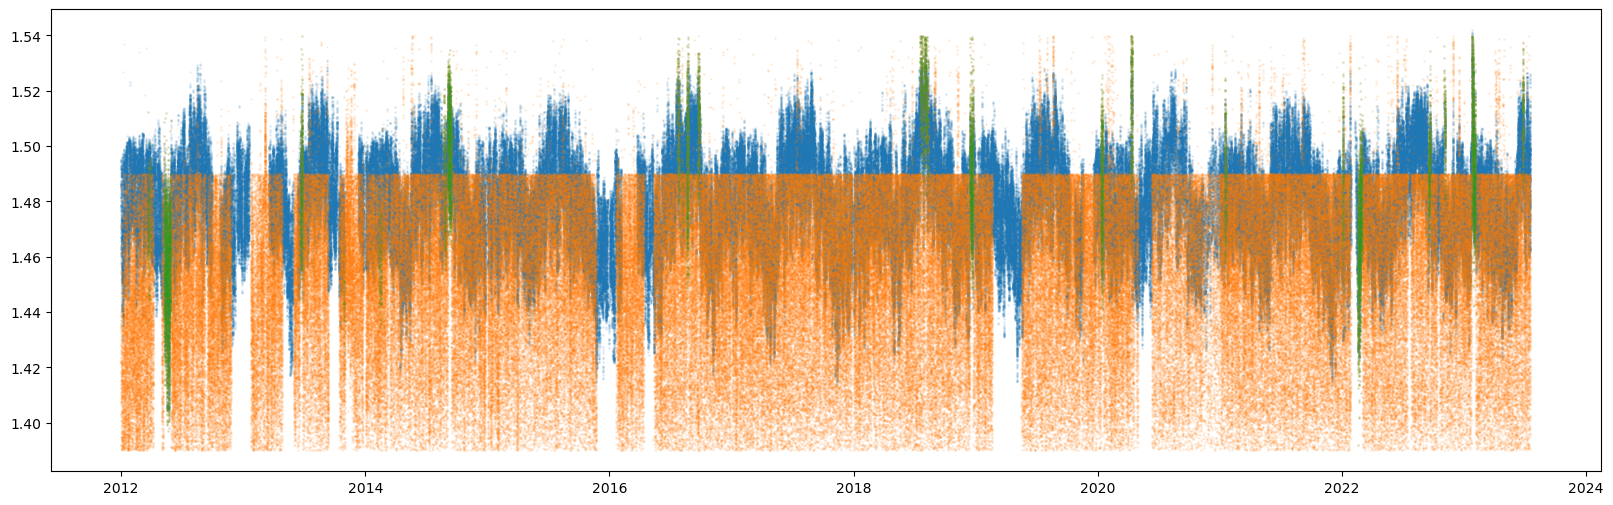

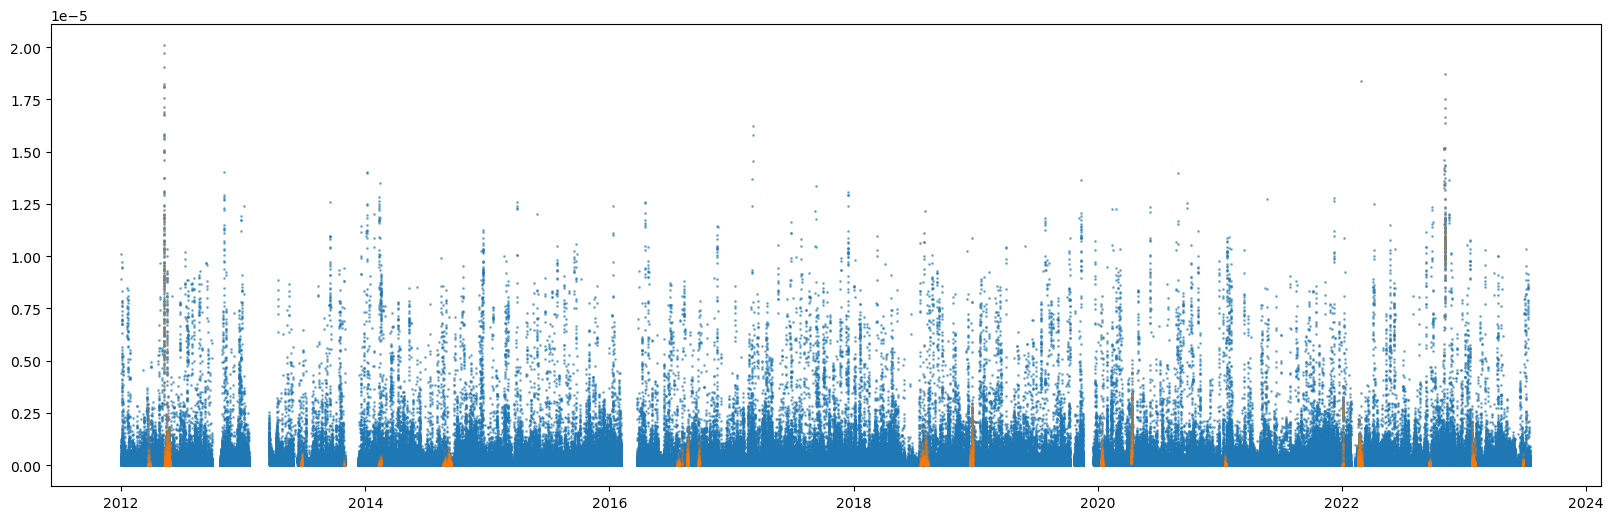

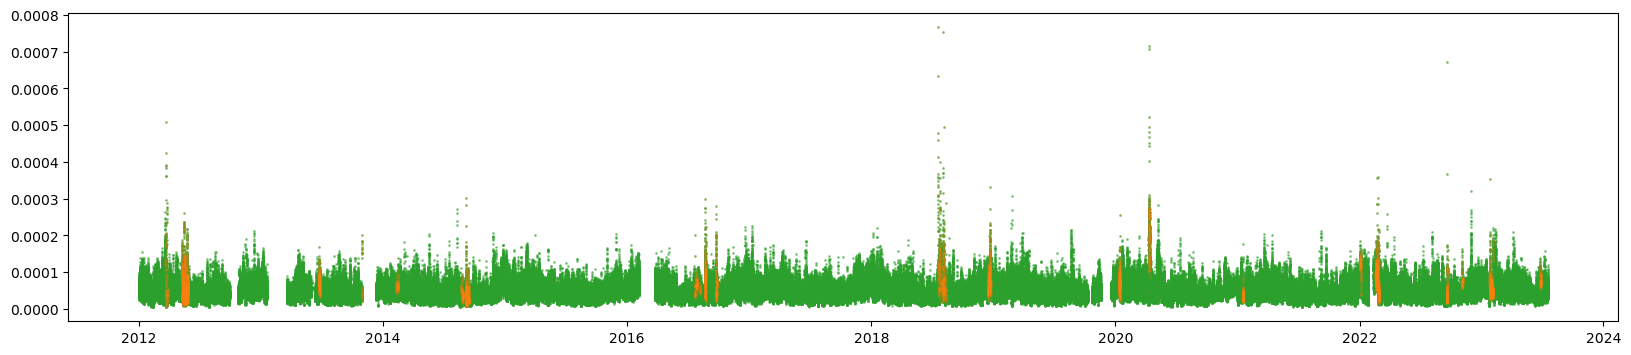

In [93]:
plt.figure(figsize=(20,6))
plt.scatter(inputs_.index, mean_preds, label='predictions', s=1, alpha=0.1)
plt.scatter(targets_.index, targets_, label='actual', s=1, alpha=0.1)
plt.scatter(y.index, y, label='parked', s=1, alpha=0.1)
plt.show()
plt.figure(figsize=(20,6))
plt.scatter(preds_df['knowledge'].index, preds_df['knowledge'], alpha=1.0, color='tab:blue',s=1)
plt.scatter(parked_preds_df['knowledge'].index, parked_preds_df['knowledge'], alpha=0.1, color='tab:orange',s=1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(preds_df['data'].index, preds_df['data'], alpha=1.0, color='tab:green',s=1)
plt.scatter(parked_preds_df['data'].index, parked_preds_df['data'], alpha=0.1, color='tab:orange',s=1)
plt.show()